In [26]:
import torch
import numpy as np
import pandas as pd

In [27]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
X = dataset.iloc[:,:-1].values #X=dataset.drop('DEPENDENT ARIABLE').values
y = dataset.iloc[:,-1].values  #y=dataset('DEPENDENT ARIABLE').values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=0)

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
# CREATING TENSORS
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [32]:
# CREATING MODEL WITH PYTORCH

class myAnn(nn.Module):
    def __init__(self, 
                 input_features=8, #no. of colums in X 
                 hidden1=20, #no. of attributes in 1st hidden
                 hidden2=20, #no. of attributes in 2nd hidden
                 out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [33]:
# CREATING AN INSTANCE FOR ANN MODEL
torch.manual_seed(20)
model = myAnn()

In [34]:
model.parameters

<bound method Module.parameters of myAnn(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [35]:
#BACKWARD PROPAGATION --DEFINE loss_function, optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [36]:
epochs = 3000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if(1%10==1):
        print("epochs: {}, loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs: 1, loss: 3.4572105407714844
epochs: 2, loss: 1.7547036409378052
epochs: 3, loss: 1.4100370407104492
epochs: 4, loss: 0.9451969861984253
epochs: 5, loss: 1.1574177742004395
epochs: 6, loss: 0.891575813293457
epochs: 7, loss: 0.7283686995506287
epochs: 8, loss: 0.8199500441551208
epochs: 9, loss: 0.6772927641868591
epochs: 10, loss: 0.695612370967865
epochs: 11, loss: 0.8019207715988159
epochs: 12, loss: 0.7153993844985962
epochs: 13, loss: 0.6444706916809082
epochs: 14, loss: 0.6793991923332214
epochs: 15, loss: 0.6693856716156006
epochs: 16, loss: 0.6191175580024719
epochs: 17, loss: 0.6354078650474548
epochs: 18, loss: 0.6668112277984619
epochs: 19, loss: 0.6472000479698181
epochs: 20, loss: 0.6048516631126404
epochs: 21, loss: 0.6090320944786072
epochs: 22, loss: 0.6296097636222839
epochs: 23, loss: 0.6203306913375854
epochs: 24, loss: 0.6038042902946472
epochs: 25, loss: 0.6073709726333618
epochs: 26, loss: 0.6146320104598999
epochs: 27, loss: 0.6013972163200378
epochs: 28, 

epochs: 240, loss: 0.426665723323822
epochs: 241, loss: 0.4228183627128601
epochs: 242, loss: 0.4231463372707367
epochs: 243, loss: 0.42197221517562866
epochs: 244, loss: 0.4206273555755615
epochs: 245, loss: 0.4225192070007324
epochs: 246, loss: 0.42268824577331543
epochs: 247, loss: 0.42926210165023804
epochs: 248, loss: 0.4418638050556183
epochs: 249, loss: 0.4451821744441986
epochs: 250, loss: 0.43110543489456177
epochs: 251, loss: 0.4230090081691742
epochs: 252, loss: 0.4180421531200409
epochs: 253, loss: 0.4199031889438629
epochs: 254, loss: 0.4198661148548126
epochs: 255, loss: 0.419328510761261
epochs: 256, loss: 0.4215067923069
epochs: 257, loss: 0.43565964698791504
epochs: 258, loss: 0.4484412968158722
epochs: 259, loss: 0.4385599195957184
epochs: 260, loss: 0.43676063418388367
epochs: 261, loss: 0.43656647205352783
epochs: 262, loss: 0.4388529658317566
epochs: 263, loss: 0.42107850313186646
epochs: 264, loss: 0.41567033529281616
epochs: 265, loss: 0.4307551085948944
epochs: 

epochs: 510, loss: 0.3926302194595337
epochs: 511, loss: 0.3831435739994049
epochs: 512, loss: 0.3921993672847748
epochs: 513, loss: 0.3979789912700653
epochs: 514, loss: 0.37516382336616516
epochs: 515, loss: 0.38386213779449463
epochs: 516, loss: 0.38628455996513367
epochs: 517, loss: 0.3648352324962616
epochs: 518, loss: 0.37023618817329407
epochs: 519, loss: 0.3813917636871338
epochs: 520, loss: 0.3623725175857544
epochs: 521, loss: 0.36321473121643066
epochs: 522, loss: 0.37450385093688965
epochs: 523, loss: 0.36511746048927307
epochs: 524, loss: 0.3619541823863983
epochs: 525, loss: 0.3773810863494873
epochs: 526, loss: 0.3594902753829956
epochs: 527, loss: 0.36089709401130676
epochs: 528, loss: 0.3717660903930664
epochs: 529, loss: 0.3646114468574524
epochs: 530, loss: 0.3585668206214905
epochs: 531, loss: 0.3599431812763214
epochs: 532, loss: 0.35868141055107117
epochs: 533, loss: 0.355619877576828
epochs: 534, loss: 0.35226255655288696
epochs: 535, loss: 0.35423925518989563
ep

epochs: 761, loss: 0.3074107766151428
epochs: 762, loss: 0.30622145533561707
epochs: 763, loss: 0.3052087724208832
epochs: 764, loss: 0.3066743016242981
epochs: 765, loss: 0.3051300346851349
epochs: 766, loss: 0.3059452474117279
epochs: 767, loss: 0.304728627204895
epochs: 768, loss: 0.30437037348747253
epochs: 769, loss: 0.30411192774772644
epochs: 770, loss: 0.30350422859191895
epochs: 771, loss: 0.3028607666492462
epochs: 772, loss: 0.30357626080513
epochs: 773, loss: 0.3030126988887787
epochs: 774, loss: 0.30446183681488037
epochs: 775, loss: 0.30504706501960754
epochs: 776, loss: 0.3082936406135559
epochs: 777, loss: 0.3134317398071289
epochs: 778, loss: 0.3268683850765228
epochs: 779, loss: 0.34522560238838196
epochs: 780, loss: 0.3717557191848755
epochs: 781, loss: 0.38751745223999023
epochs: 782, loss: 0.3823499381542206
epochs: 783, loss: 0.35151830315589905
epochs: 784, loss: 0.3137107491493225
epochs: 785, loss: 0.31330734491348267
epochs: 786, loss: 0.3388117551803589
epoch

epochs: 1048, loss: 0.28802284598350525
epochs: 1049, loss: 0.2872615158557892
epochs: 1050, loss: 0.28537166118621826
epochs: 1051, loss: 0.28590482473373413
epochs: 1052, loss: 0.28448259830474854
epochs: 1053, loss: 0.28623518347740173
epochs: 1054, loss: 0.28435957431793213
epochs: 1055, loss: 0.2850450575351715
epochs: 1056, loss: 0.2840574085712433
epochs: 1057, loss: 0.2866591513156891
epochs: 1058, loss: 0.2857690453529358
epochs: 1059, loss: 0.2891996502876282
epochs: 1060, loss: 0.29230061173439026
epochs: 1061, loss: 0.3024791479110718
epochs: 1062, loss: 0.31650224328041077
epochs: 1063, loss: 0.33817413449287415
epochs: 1064, loss: 0.3521069586277008
epochs: 1065, loss: 0.36403214931488037
epochs: 1066, loss: 0.34903550148010254
epochs: 1067, loss: 0.30483493208885193
epochs: 1068, loss: 0.28906068205833435
epochs: 1069, loss: 0.31340402364730835
epochs: 1070, loss: 0.3405163586139679
epochs: 1071, loss: 0.3527193069458008
epochs: 1072, loss: 0.3279355764389038
epochs: 107

epochs: 1328, loss: 0.27317315340042114
epochs: 1329, loss: 0.27325743436813354
epochs: 1330, loss: 0.2720453441143036
epochs: 1331, loss: 0.27543455362319946
epochs: 1332, loss: 0.2785373330116272
epochs: 1333, loss: 0.2839010953903198
epochs: 1334, loss: 0.2922637462615967
epochs: 1335, loss: 0.30222946405410767
epochs: 1336, loss: 0.3130744993686676
epochs: 1337, loss: 0.31918972730636597
epochs: 1338, loss: 0.3301445543766022
epochs: 1339, loss: 0.35154348611831665
epochs: 1340, loss: 0.35250145196914673
epochs: 1341, loss: 0.33673545718193054
epochs: 1342, loss: 0.3024391531944275
epochs: 1343, loss: 0.28555285930633545
epochs: 1344, loss: 0.27487751841545105
epochs: 1345, loss: 0.27802613377571106
epochs: 1346, loss: 0.2922345995903015
epochs: 1347, loss: 0.3017016053199768
epochs: 1348, loss: 0.29630640149116516
epochs: 1349, loss: 0.2790140211582184
epochs: 1350, loss: 0.2739846408367157
epochs: 1351, loss: 0.27777764201164246
epochs: 1352, loss: 0.2874751091003418
epochs: 1353

epochs: 1593, loss: 0.2731171250343323
epochs: 1594, loss: 0.26487231254577637
epochs: 1595, loss: 0.25689709186553955
epochs: 1596, loss: 0.25248098373413086
epochs: 1597, loss: 0.25699588656425476
epochs: 1598, loss: 0.2598158121109009
epochs: 1599, loss: 0.2582680583000183
epochs: 1600, loss: 0.25374850630760193
epochs: 1601, loss: 0.2509164810180664
epochs: 1602, loss: 0.25242263078689575
epochs: 1603, loss: 0.25376495718955994
epochs: 1604, loss: 0.25594428181648254
epochs: 1605, loss: 0.25470447540283203
epochs: 1606, loss: 0.2511226236820221
epochs: 1607, loss: 0.2487432062625885
epochs: 1608, loss: 0.24971480667591095
epochs: 1609, loss: 0.2523142993450165
epochs: 1610, loss: 0.2544918656349182
epochs: 1611, loss: 0.256743460893631
epochs: 1612, loss: 0.2561635375022888
epochs: 1613, loss: 0.2535744905471802
epochs: 1614, loss: 0.2503155469894409
epochs: 1615, loss: 0.24804839491844177
epochs: 1616, loss: 0.24844568967819214
epochs: 1617, loss: 0.2509693205356598
epochs: 1618, 

epochs: 1878, loss: 0.24073028564453125
epochs: 1879, loss: 0.23917698860168457
epochs: 1880, loss: 0.23851720988750458
epochs: 1881, loss: 0.2338855266571045
epochs: 1882, loss: 0.23368626832962036
epochs: 1883, loss: 0.23302337527275085
epochs: 1884, loss: 0.23434773087501526
epochs: 1885, loss: 0.23821261525154114
epochs: 1886, loss: 0.2418067455291748
epochs: 1887, loss: 0.24300700426101685
epochs: 1888, loss: 0.2452356368303299
epochs: 1889, loss: 0.2502830922603607
epochs: 1890, loss: 0.2561253309249878
epochs: 1891, loss: 0.2570982575416565
epochs: 1892, loss: 0.2501644194126129
epochs: 1893, loss: 0.24151179194450378
epochs: 1894, loss: 0.23481066524982452
epochs: 1895, loss: 0.2347925752401352
epochs: 1896, loss: 0.2365887612104416
epochs: 1897, loss: 0.24044066667556763
epochs: 1898, loss: 0.2442658245563507
epochs: 1899, loss: 0.24631206691265106
epochs: 1900, loss: 0.2513405382633209
epochs: 1901, loss: 0.25265705585479736
epochs: 1902, loss: 0.25152674317359924
epochs: 190

epochs: 2086, loss: 0.28551575541496277
epochs: 2087, loss: 0.24449782073497772
epochs: 2088, loss: 0.2253028005361557
epochs: 2089, loss: 0.25370073318481445
epochs: 2090, loss: 0.2755299210548401
epochs: 2091, loss: 0.2780393958091736
epochs: 2092, loss: 0.25895315408706665
epochs: 2093, loss: 0.23177258670330048
epochs: 2094, loss: 0.23807953298091888
epochs: 2095, loss: 0.2588185667991638
epochs: 2096, loss: 0.2506382167339325
epochs: 2097, loss: 0.22606179118156433
epochs: 2098, loss: 0.22657495737075806
epochs: 2099, loss: 0.24596059322357178
epochs: 2100, loss: 0.25299569964408875
epochs: 2101, loss: 0.23154322803020477
epochs: 2102, loss: 0.22626684606075287
epochs: 2103, loss: 0.2388623207807541
epochs: 2104, loss: 0.2570747435092926
epochs: 2105, loss: 0.27312567830085754
epochs: 2106, loss: 0.2620328664779663
epochs: 2107, loss: 0.24642163515090942
epochs: 2108, loss: 0.23322542011737823
epochs: 2109, loss: 0.23091593384742737
epochs: 2110, loss: 0.23874877393245697
epochs: 

epochs: 2361, loss: 0.20610162615776062
epochs: 2362, loss: 0.20410025119781494
epochs: 2363, loss: 0.20544330775737762
epochs: 2364, loss: 0.2127518504858017
epochs: 2365, loss: 0.22167560458183289
epochs: 2366, loss: 0.22095432877540588
epochs: 2367, loss: 0.21755561232566833
epochs: 2368, loss: 0.20521920919418335
epochs: 2369, loss: 0.2058129757642746
epochs: 2370, loss: 0.21134941279888153
epochs: 2371, loss: 0.22080093622207642
epochs: 2372, loss: 0.22508856654167175
epochs: 2373, loss: 0.21988964080810547
epochs: 2374, loss: 0.20505177974700928
epochs: 2375, loss: 0.2029181569814682
epochs: 2376, loss: 0.21147951483726501
epochs: 2377, loss: 0.21890345215797424
epochs: 2378, loss: 0.21475137770175934
epochs: 2379, loss: 0.20627650618553162
epochs: 2380, loss: 0.20051369071006775
epochs: 2381, loss: 0.20378050208091736
epochs: 2382, loss: 0.2175932377576828
epochs: 2383, loss: 0.22375379502773285
epochs: 2384, loss: 0.21698756515979767
epochs: 2385, loss: 0.20424884557724
epochs:

epochs: 2592, loss: 0.19850122928619385
epochs: 2593, loss: 0.20041871070861816
epochs: 2594, loss: 0.20554929971694946
epochs: 2595, loss: 0.1997792273759842
epochs: 2596, loss: 0.1988585740327835
epochs: 2597, loss: 0.19550155103206635
epochs: 2598, loss: 0.19362513720989227
epochs: 2599, loss: 0.19470196962356567
epochs: 2600, loss: 0.19203564524650574
epochs: 2601, loss: 0.19493034482002258
epochs: 2602, loss: 0.19211605191230774
epochs: 2603, loss: 0.19321709871292114
epochs: 2604, loss: 0.19313845038414001
epochs: 2605, loss: 0.19183564186096191
epochs: 2606, loss: 0.19271187484264374
epochs: 2607, loss: 0.19135606288909912
epochs: 2608, loss: 0.19190363585948944
epochs: 2609, loss: 0.19106397032737732
epochs: 2610, loss: 0.19153308868408203
epochs: 2611, loss: 0.19089534878730774
epochs: 2612, loss: 0.19092726707458496
epochs: 2613, loss: 0.19149956107139587
epochs: 2614, loss: 0.19226261973381042
epochs: 2615, loss: 0.19493283331394196
epochs: 2616, loss: 0.19934800267219543
ep

epochs: 2806, loss: 0.18233217298984528
epochs: 2807, loss: 0.18357981741428375
epochs: 2808, loss: 0.18337425589561462
epochs: 2809, loss: 0.18482699990272522
epochs: 2810, loss: 0.18649227917194366
epochs: 2811, loss: 0.1870582103729248
epochs: 2812, loss: 0.1878795027732849
epochs: 2813, loss: 0.18876633048057556
epochs: 2814, loss: 0.1872808337211609
epochs: 2815, loss: 0.18362927436828613
epochs: 2816, loss: 0.18059176206588745
epochs: 2817, loss: 0.17962628602981567
epochs: 2818, loss: 0.17900748550891876
epochs: 2819, loss: 0.17853045463562012
epochs: 2820, loss: 0.17873258888721466
epochs: 2821, loss: 0.17802560329437256
epochs: 2822, loss: 0.17776134610176086
epochs: 2823, loss: 0.17776784300804138
epochs: 2824, loss: 0.17866837978363037
epochs: 2825, loss: 0.18126264214515686
epochs: 2826, loss: 0.18733514845371246
epochs: 2827, loss: 0.19305969774723053
epochs: 2828, loss: 0.19788123667240143
epochs: 2829, loss: 0.19894130527973175
epochs: 2830, loss: 0.19908219575881958
epo

In [37]:
# plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'epoch')

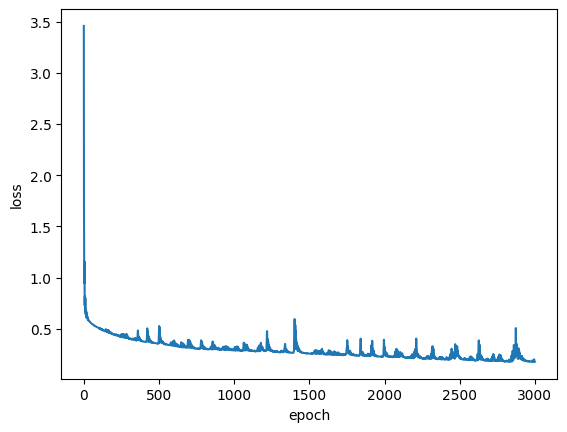

In [38]:
tensor_loss = torch.tensor(final_losses)
plt.plot(range(epochs), tensor_loss)
#plt.plot(range(epochs), final_losses.grad)
plt.ylabel('loss')
plt.xlabel('epoch')

In [39]:
# PREDICTING IN X_TEST DATA
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
1
1
0
0
1
1
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
0
1
0
1
0
0
0
0
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, predictions)
cm

array([[82, 25],
       [22, 25]], dtype=int64)

Text(95.72222222222221, 0.5, 'predicted values')

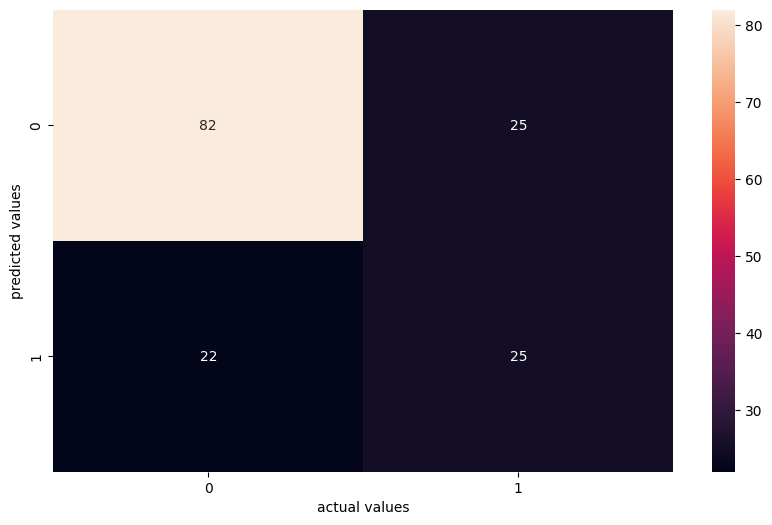

In [41]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [42]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.6948051948051948

In [43]:
torch.save(model, 'diabetes.pt')

In [44]:
torch.load('diabetes.pt')

myAnn(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [49]:
list(dataset.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [50]:
lst1 = [7.0, 194.0, 52.0, 40.0, 2.0, 45.6, 0.332, 45.0]

In [53]:
new_data = torch.tensor(lst1)

In [59]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([-8.9375,  9.3643])
1
